# Some Recommended Practice Environmental conditions
## 2.3 Wind modelling
### 2.3.1 Mean wind speed

#### 2.3.1.1
Weibull distribution 
See 2.3.3.1

#### 2.3.1.2 

Weibull distribution can be assumed for arbitrary 10-minute mean wind speed U<sub>10</sub>

\begin{equation}
F_{U_{10}}(u)=1-\exp \left(-\left(\frac{u}{A}\right)^{k}\right)
\end{equation}

A: scale parameter
k: shape parameter

Both are site- and height-dependent

Three parameter Weibull distribution may provded more felxibility and a better fit to data.

\begin{equation}
F_{U_{10}}(u)=1-\exp \left(-\left(\frac{u-\gamma}{A}\right)^{k}\right)
\end{equation}

$\gamma$ is the location parameter.



#### 2.3.1.3 
Hurricane data

#### 2.3.1.4 
sampling schemes

#### 2.3.1.5 
U<sub>10</sub> is the basis of F<sub>U10</sub>(u) for U<sub>10</sub>

#### 2.3.1.6 
The distribution of the annual maximum 10-minute mean wind speed U<sub>10,max</sub> can be approximated by

\begin{equation}
F_{U_{10, \text { max }^{\prime}} \text { 1year }}(u)=\left(F_{U_{10}}(u)\right)^{N}
\end{equation}

N = 52 560 and N = 52595 in leap years

#### 2.3.1.7 
N is independent of the sampling frequency

#### 2.3.1.8 
If hurricanes occur, the Annual maximum 10-minute mean wind speed U<sub>10,max</sub> shall be based on available hurricane data.

#### 2.3.1.9 
The power-law approximation is a good one to the upper tail of this distribution.  Gumbel distribution may be more practical to use.

#### 2.3.1.10 
The annual maxiumu of the 10-minute mean wind speed U<sub>10,max</sub> can be assumed to follow a Gumbel distribution
<div class="math">
\begin{equation}
F_{U_{10, \max ^{\prime}} 1 y e a r}(u)=\exp \{-\exp [-a(u-b)]\}
\end{equation}
</div>

a and b are site- and height-dependent distribution parameters.

#### 2.3.1.11

Since wind loads are formed by wind pressures, which are proportional to the square of the wind speed,for estimation of characteristic loads defined as the 98% or 99% quantile, use square of the annual maximum of the 10-min mean wind speed and extrapolate to 50- or 100 year return value.

#### 2.3.1.12

Return period _T_<sub>R</sub> in units of years is (1-1/_T_<sub>R</sub>) _U_<sub>10,TR</sub>

\begin{equation}
U_{10, T_{R}}=F_{U_{10, \max ^{\prime}} 1 \text { 1year }}^{-1}\left(1-\frac{1}{{ }_{R}}\right) ; T_{R}>1 \text { year }
\end{equation}


#### 2.3.1.13

50-year 10-minute mean wind speed:

\begin{equation}
U_{10,50}=F_{U_{10, \text { max }^{\prime}} \text { 1year }}^{-1}(0.98)
\end{equation}

100-year 10-minute mean wind speed:

\begin{equation}
U_{10,100}=F_{U_{10, \text { max }^{\prime}} \text { 1year }}^{-1}(0.99)
\end{equation}

When the annual maximum 10-minute mean wind speed is Gumbel-distributed, the 1-year 10-minute mean wind speed becomes,

\begin{equation}
U_{10,1}=F_{U_{10, \text { max }^{\prime}} \text { 1year }}^{-1}(0.368)
\end{equation}


### 2.3.2 Wind speed profiles
#### 2.3.2.1
Idealised model profiles
* the Logarithmic profiles
* the Power law model 
* the Frøya model

#### 2.3.2.2
Application limited to NOT complex wind profiles

#### 2.3.2.3

Friction velocity _u_<sup>*</sup> 

\begin{equation}
u^{*}=\sqrt{\tau / \rho_{a}}
\end{equation}

$\tau$ is the surface shear streas and $\rho_{a}$ is air density

\begin{equation}
u^{*}=\sqrt{\kappa} * U_{10}
\end{equation}

$\kappa$ is a surface drag coefficient



2.3.2.4 

The logarithmic wind speed profile

\begin{equation}
U(z)=\frac{u^{*}}{k_{a}} \ln \frac{z}{z_{0}} \\
\end{equation}

where $\kappa_{a}=0.4$, von Karman’s constant,$z$ is the height and $z_0$ is a terrain roughness parameter

Open sea without waves $z_0$ = 0.0001

Open sea without waves $z_0$ = 0.0001 to 0.01

Coastal Areas with on shore wind $z_0$ = 0.001 to 0.01

#### 2.3.2.5

Roughness paramter $z_0$ for offshore can be solved implicitly from 

\begin{equation}
z_{0}=\frac{A_{C}}{g}\left(\frac{k_{a} U(z)}{\ln \left(z / z_{0}\right)}\right)^{2}
\end{equation}

g is acceleration of gravity. and $A_C$ is Charnock's constant 
* Open sea fully developed waves $A_C = 0.011-0.014$

refer to Astrup et al.(1999)

The parameter can also be obtained from open access database, such as [Copernicus Climate Data](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview) data or wave model output.
 


#### 2.3.2.6
An Alternative formulation of the logarithmic profile

$U(z)=U(H) \cdot\left(1+\frac{1}{k_{a}} \sqrt{\kappa} \cdot \ln \frac{z}{H}\right)$


$\kappa=\frac{k_{a}^{2}}{\left(\ln \frac{H}{z_{0}}\right)^{2}}$

is the surface friction coefficient.

The logarithmic profile may be rewritten as 

$U(z)=U(H) \cdot\left(1+\frac{\ln \left(\frac{Z}{h}\right)}{\ln \left(\frac{H}{z_{0}}\right)}\right)$

#### 2.3.2.7

Scale parameter defined in 2.3.2.1 can be expressed as 

\begin{equation}
A(z)=A(H) \frac{\ln \frac{Z}{z_{0}}}{\ln \frac{H}{z_{0}}}
\end{equation}

#### 2.3.2.8

Power law profile

\begin{equation}
U(z)=U(H)\left(\frac{z}{H}\right)^{\alpha}
\end{equation}

$\alpha$ depends on the terrain roughness

#### 2.3.2.9 

Logarithmic and power law combined


\begin{equation}
\alpha=\frac{\ln \left(\frac{\ln \frac{z}{z_{0}}}{\ln \frac{H}{z_{0}}}\right)}{\ln \left(\frac{z}{H}\right)}
\end{equation}


####2.3.2.10

$\alpha$ definition 


#### 2.3.2.11 

Frøya wind profile model 

$U(T, z)=U_{0} \cdot\left\{1+C \cdot \ln \frac{z}{H}\right\} \cdot\left\{1-0.41 \cdot I_{U}(z) \ln \frac{T}{T_{0}}\right\}$

where $H=10 \mathrm{~m}, T_{0}=1$ hour and $T<T_{0}$, where

$C=5.73 \cdot 10^{-2} \sqrt{1+0.148 U_{0}}$

$I_{U}=0.06 \cdot\left(1+0.043 U_{0}\right) \cdot\left(\frac{z}{H}\right)^{-0.22}$

#### 2.3.2.12

The gust factor allows conversion of mean wind sppeds between different averaging periods. 

The Frøya wind speed profile is the best documented wind speed profile for offshore locations and maritime conditions.

#### 2.3.2.13

$C$ at open sea tend to be 10% smaller than the value from quoted expression. At coastal zones, higher $C$ should be used.

#### 2.3.2.14

Use with caution.

#### 2.3.2.15 

Conversion based on the logarithmic wind profile. For the exponential wind profile is used, the expression shouild be considered used only for averaging periods conversion.


#### 2.3.2.16

Tropical storm consideration WMO(2008)

#### 2.3.2.17 Squall winds not applicable

2.3.2.18 

wind profile model consistency

####2.3.2.19

Conversion of wind data to heights without wind measurements will be encumbered with uncertainty

#### 2.3.2.20

HSE(2002) gives an indication of the accuracy of conversion.

### 2.3.3 Turbulance

#### 2.3.3.1

\begin{equation}
\begin{array}{l}
F_{\sigma_{U} \mid U_{10}}(\sigma)=\Phi\left(\frac{\ln \sigma-b_{0}}{b_{1}}\right)\\
\end{array}
\end{equation}


in which Ф( ) denotes the standard Gaussian cumulative distribution function 

\begin{equation}
\begin{array}{l}
\Phi(x)=\frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{x} e^{-\xi^{2} / 2} d \xi
\end{array}
\end{equation}

The coefficients ${b_0}$ and ${b_1}$ are site-dependent coefficients dependent on ${U_{10}}$.

####2.3.3.2

$b_0$  can be interpreted as the mean value of $ln σ_U$
$b_1$ as the standard deviation of $ln σ_U$

\begin{equation}
\begin{array}{l}
E\left[\sigma_{U}\right]=\exp \left(b_{0}+\frac{1}{2} b_{1}^{2}\right) \\
D\left[\sigma_{U}\right]=E\left[\sigma_{U}\right] \sqrt{\exp \left(b_{1}^{2}\right)-1}
\end{array}
\end{equation}

Reference to _Guidelines for Design of Wind Turbine (2002)_

#### 2.3.3.3

$E[\sigma_U]$ and $D[\sigma_U]$ depend on $z_0$ and $U_{10}$

Onshore (near a building) is larger than offshore.




2.3.3.4

In some cases, a lognormal distribution for $\sigma_U$ conditioned on $U_{10}$ will underestimate the higher values of $σ_U$.

A Frechet distribution may be suitable

\begin{equation}
F_{\sigma_{U} \mid U_{10}}(\sigma)=\exp \left(-\left(\frac{\sigma_{0}}{\sigma}\right)^{k}\right)
\end{equation}

The distribution parameter _k_ can be solved implicitly from:

\begin{equation}
\left(\frac{D\left[\sigma_{U}\right]}{E\left[\sigma_{U}\right]}\right)^{2}=\frac{\Gamma\left(1-\frac{2}{k}\right)}{\Gamma^{2}\left(1-\frac{1}{k}\right)}-1
\end{equation}

and the distribution parameter $\sigma_0$ then results as:

\begin{equation}
\sigma_{0}=\frac{E\left[\sigma_{U}\right]}{\Gamma\left(1-\frac{1}{k}\right)}
\end{equation}

where $\Gamma$ denotes the gamma function:

\begin{equation}
\Gamma(x)=\int_{0}^{\infty} t^{x-1} e^{-t} d t
\end{equation}


####2.3.3.5

Caution: Lognormal, normal distribution, Weibull distribution or a Frechet is also common. Make sure the data input and application domain.

#### 2.3.3.6 
Mean value of the standard deviation $\sigma_U$, conditioned on $U_{10}$

\begin{equation}
E\left[\sigma_{U}\right]=U_{10} A_{x} k_{a} \frac{1}{\ln \frac{Z}{z_{0}}}=A_{x} u^{*}
\end{equation}

in which

$K_a = 0.4$ von Karman's constant

z = the height above terrain

$z_0$ = the roughness parameter

$A_x$ = constant which depends on $z_0$

The following approximation to $A_x$ may be used for purely mechanical turbulence (neutral conditions) over uniform and flat terrain

\begin{equation}
A_{x}=\sqrt{4.5-0.856 \ln z_{0}}
\end{equation}

which $z_0$ is to be given in units of m


#### 2.3.3.7

$U_{10}$ and $\sigma_{U}$ in lateral and vertical direction

Mean lateral wind speed = 0, $\sigma_{Uy}$ =0.75$\sigma_{U}$ ~ 0.80$\sigma_{U}$

Vertical $\sigma_{Uz}$ =0.5$\sigma_{U}$


#### 2.3.3.8

When no measurements available, use conservatively high values for $\sigma_{U}$ for design purposes.

### 2.3.4 Wind Spectra

#### 2.3.4.1 

Short-term stationary wind conditions may be described by a wind spectrum, which can be determined from measured wind data.

#### 2.3.4.2 
Spectral densities from measured data requirement:

The spectral density $S_U(f)$ shall asymptotically approach the following form as the frequency $f$ in the high frequency range increases

\begin{equation}
S_{U}(f)=0.14 \cdot \sigma_{U}^{2}\left(\frac{L_{u}}{U_{10}}\right)^{-\frac{2}{3}} f^{-\frac{5}{3}}
\end{equation}

$L_u$ is the integral length scale of the wind speed process


#### 2.3.4.3

Wind spectral denstiy can be represented by a model spectrum.

Most models are calibrated over land and a few over water.

#### 2.3.4.4

Caution :true integral length scale of the wind speed process may deviate significantly from the integral length scale of the model spectrum.

#### 2.3.4.5 
Davenport spectrum

#### 2.3.4.6 

The Davenport spectrum is not recommended for use in the low frequency range,

#### 2.3.4.7 

Kaimal Spectrum

#### 2.3.4.8

An alternative specification of the integral length scale is given in IEC61400-1

#### 2.3.4.9 

Harris spectrum

#### 2.3.4.10 

For design of offshore structures, the empirical Simiu and Leigh spectrum may be applied

#### 2.3.4.11

 For design of offshore structures, the empirical Ochi and Shin spectrum may be applied

 #### 2.3.4.12(Test later)

 For situations where excitation in the low-frequency range is of importance, the Frøya model spectral density proposed by Andersen and Løvseth (1992, 2006) is recommended for wind over water.


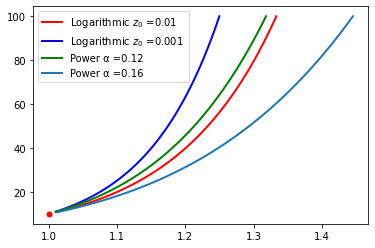

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Z_0 = 0.01
Z_1 = 0.001
K_a = 0.4

Height = np.linspace(11,100, 100)

H = 10
alpha1 = 0.12
alpha2 = 0.16
Kappa = K_a**2 /((np.log(H/Z_0)))**2

Uz1 = (1+1/K_a*np.sqrt(Kappa)*np.log(Height / H))
Uz2 = (1+np.log(Height/H)/np.log(H/Z_1))
UzPower1 = (Height/H)**alpha1
UzPower2 = (Height/H)**alpha2
plt.plot(Uz1, Height, "r-", lw=2,label = f'Logarithmic $z_{0}$ ={Z_0} ')
plt.plot(Uz2, Height, "b-", lw=2,label = f'Logarithmic $z_{0}$ ={Z_1} ')
plt.plot(UzPower1, Height, "g-", lw=2,label = f'Power \u03B1 ={alpha1} ')
plt.plot(UzPower2, Height, "-", lw=2,label = f'Power \u03B1 ={alpha2} ')
plt.plot(1, 10,'.r',markersize=10)

plt.legend()


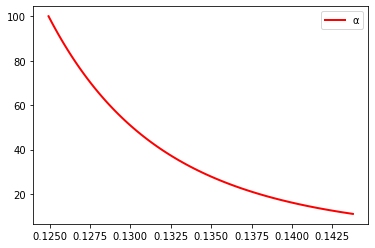

In [3]:
alpha = np.log(np.log(Height / Z_0) / np.log(H/Z_0)) / np.log( Height / H)
plt.plot(alpha, Height, "r-", lw=2,label = f'\u03B1')
plt.legend()

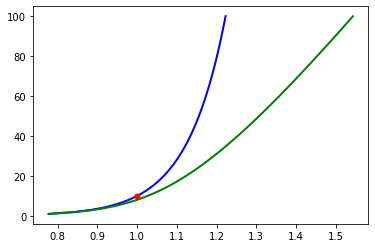

In [5]:
#Frøya wind profile model d


U_0 = 12.5 
H = 10
T_0 = 10#min


Height = np.linspace(1,100, 100)


C = 5.73 * 10**(-2) * np.sqrt(1 + 0.148* U_0)

I_U = 0.06 * (1 + 0.043 * U_0)* (Height / H)

T10 = 10
T20 = 5
Ux10 = U_0 * (1 + C * np.log(Height/H)) * ( 1 - 0.41 * I_U * np.log(T10 / T_0))
Ux20 = U_0 * (1 + C * np.log(Height/H)) * ( 1 - 0.41 * I_U * np.log(T20 / T_0))
plt.plot(Ux10/U_0, Height, "b-", lw=2,label = f'Frøya T = 10min')
plt.plot(Ux20/U_0, Height, "g-", lw=2,label = f'Frøya T = 20min')
plt.plot(U_0/U_0 , 10,'.r',markersize=10)


Following script is from  [Risk Engineering: Analyzing weather data¶](https://risk-engineering.org/notebook/data-analysis-weather.html)

In [1]:
import numpy
import scipy.stats
import pandas
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [2]:
data = pandas.read_csv("https://risk-engineering.org/static/data/TLS-weather-data-2013.csv")
data.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2013-1-1,12,9,6,8,7,5,93,86,76,...,31,10,5,26,14,NaN,5.08,7.0,Rain,234
1,2013-1-2,9,7,4,6,4,2,93,86,71,...,31,11,10,23,16,NaN,0.00,5.0,NaN,298
2,2013-1-3,8,4,0,4,2,-1,100,87,69,...,19,10,10,13,5,NaN,0.00,5.0,NaN,118
3,2013-1-4,7,6,5,7,6,4,100,94,83,...,10,6,1,10,5,NaN,0.00,8.0,Fog,292
4,2013-1-5,7,6,5,6,6,4,100,94,90,...,11,9,2,16,8,NaN,0.00,8.0,NaN,306


Text(0.5, 0, 'Mean wind speed (km/h)')

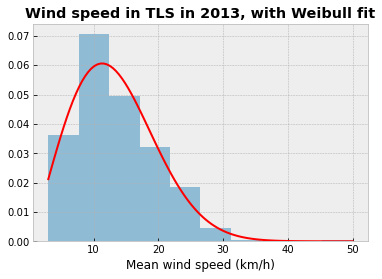

In [3]:
wind = data["Mean Wind SpeedKm/h"]
p0, p1, p2 = scipy.stats.weibull_min.fit(wind, floc=0)
plt.hist(wind, density=True, alpha=0.5)
support = numpy.linspace(wind.min(), wind.max(), 100)
plt.plot(support, scipy.stats.weibull_min.pdf(support, p0, p1, p2), "r-", lw=2)
plt.title("Wind speed in TLS in 2013, with Weibull fit", weight="bold")
plt.xlabel("Mean wind speed (km/h)")

KstestResult(statistic=0.10271843796037439, pvalue=0.0008323398083244365)

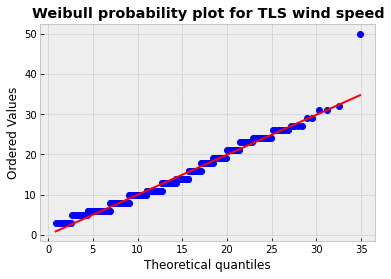

In [4]:
scipy.stats.probplot(wind, dist=scipy.stats.weibull_min(p0, p1, p2), 
                     plot=plt.figure().add_subplot(111))
plt.title("Weibull probability plot for TLS wind speed", weight="bold")
scipy.stats.kstest(wind, "weibull_min", args=(p0, p1, p2))

### 2.3.3 Turbulance

